### 당뇨병 데이터셋 활용의 나쁜 예제

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6       63             72             35        0  33.6   
1            1       85             35             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768

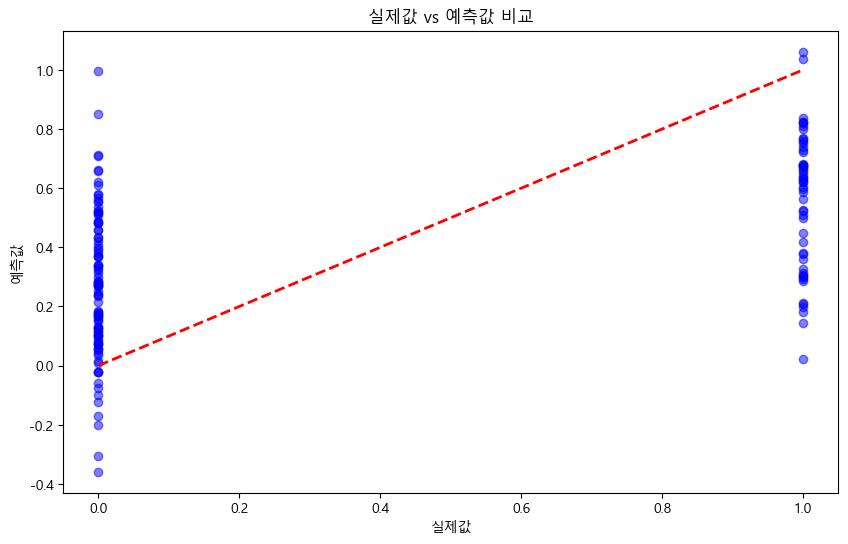

In [4]:
"""
당뇨병 데이터셋은 회귀가 아닌 분류 문제이므로
분류 모델을 사용해야 함

다음은 회귀를 사용했을 때의 결과
"""
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 폰트지정
plt.rcParams['font.family'] = 'Malgun Gothic'

# 마이너스 부호 깨짐 지정
plt.rcParams['axes.unicode_minus'] = False

# 데이터 로드
diabetes = pd.read_csv('./dataset/diabetes.csv')

print(diabetes.head())
print(diabetes.info())

# 특성(X)과 타겟(y) 분리
X = diabetes.drop('Outcome', axis=1)  # Outcome 열을 제외한 모든 특성
y = diabetes['Outcome']  # 타겟 변수

# 데이터 분할 (학습용 80%, 테스트용 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 선형회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 테스트 세트에 대한 예측
y_pred = model.predict(X_test)
print(y_pred)

# 모델 성능 평가
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
# 결과 출력

print('모델 성능 평가 결과:')
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'R2 Score: {r2:.4f}')

# 각 특성의 계수(가중치) 출력
feature_coefficients = pd.DataFrame({
    '특성': X.columns,
    '계수': model.coef_
})
print('\n특성별 가중치:')
print(feature_coefficients)

# 실제값과 예측값 비교 시각화
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('실제값')
plt.ylabel('예측값')
plt.title('실제값 vs 예측값 비교')
plt.show()

In [5]:
# 예시: 첫 번째 테스트 데이터에 대한 예측
sample_data = X_test.iloc[0:1]
prediction = model.predict(sample_data)
print('\n새로운 데이터 예측 결과:')
print(f'예측값: {prediction[0]:.4f}')
print('실제 데이터:', sample_data.values[0])


새로운 데이터 예측 결과:
예측값: 0.3412
실제 데이터: [  6.    98.    58.    33.   190.    34.     0.43  43.  ]


### 랜덤포레스트로 학습한 당뇨병데이터

모델 성능 평가:

교차 검증 점수:
평균 정확도: 0.7670 (+/- 0.0642)

분류 리포트:
              precision    recall  f1-score   support

           0       0.79      0.80      0.79        99
           1       0.63      0.62      0.62        55

    accuracy                           0.73       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.73      0.73      0.73       154



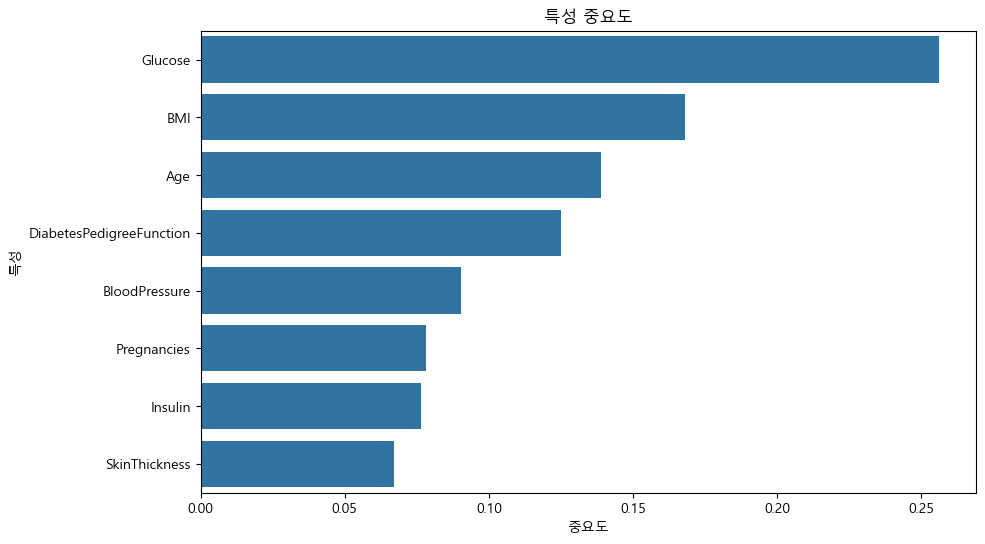

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드
data = pd.read_csv('./dataset/diabetes.csv')

# 특성(X)과 타겟(y) 분리
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# 데이터 전처리: 특성 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 랜덤 포레스트 모델 생성 및 학습
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 예측
y_pred = rf_model.predict(X_test)

# 교차 검증 수행
cv_scores = cross_val_score(rf_model, X_scaled, y, cv=5)

# 특성 중요도 계산
feature_importance = pd.DataFrame({
    '특성': X.columns,
    '중요도': rf_model.feature_importances_
}).sort_values('중요도', ascending=False)

# 결과 출력
print("모델 성능 평가:")
print("\n교차 검증 점수:")
print(f"평균 정확도: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
print("\n분류 리포트:")
print(classification_report(y_test, y_pred))

# 특성 중요도 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='중요도', y='특성', data=feature_importance)
plt.title('특성 중요도')
plt.show()

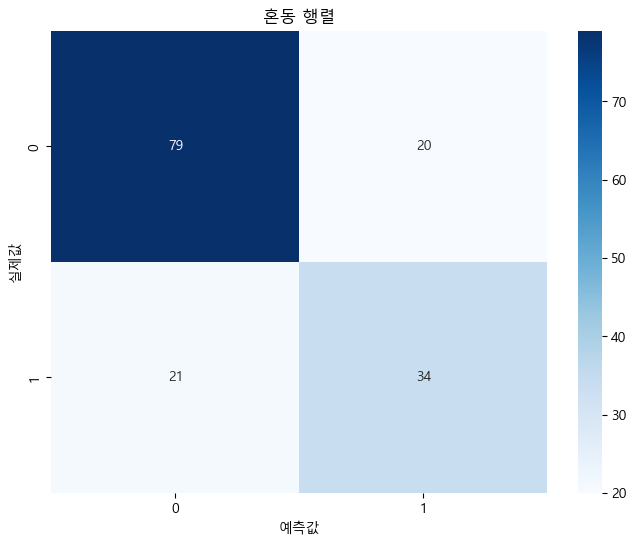

In [7]:
# 혼동 행렬 시각화
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('혼동 행렬')
plt.xlabel('예측값')
plt.ylabel('실제값')
plt.show()


새로운 환자 데이터 예측 예시:
예측 결과: 정상
당뇨병일 확률: 38.00%

예측 신뢰도 분포:


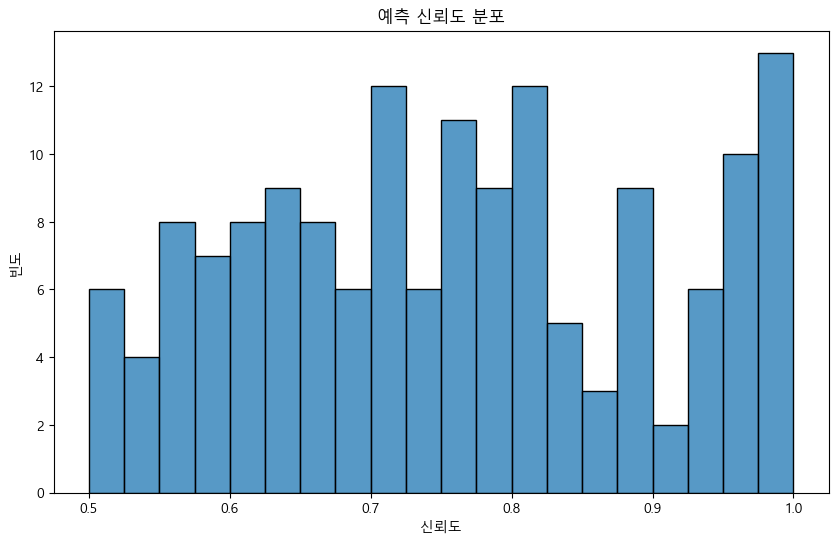

In [8]:
# 새로운 환자 데이터로 예측 예시
print("\n새로운 환자 데이터 예측 예시:")
# 임의의 환자 데이터 생성
new_patient = X_test.iloc[0:1]  # 첫번째 인덱스 값
prediction = rf_model.predict(new_patient)
prediction_prob = rf_model.predict_proba(new_patient)

print(f"예측 결과: {'당뇨병 환자' if prediction[0] == 1 else '정상'}")
print(f"당뇨병일 확률: {prediction_prob[0][1]:.2%}")

# 예측 신뢰도 분석
threshold_probs = rf_model.predict_proba(X_test)
confidence_scores = np.max(threshold_probs, axis=1)

print("\n예측 신뢰도 분포:")
plt.figure(figsize=(10, 6))
sns.histplot(confidence_scores, bins=20)  # bins=20 : 데이터를 20개의 구간으로 보여줌
plt.title('예측 신뢰도 분포')
plt.xlabel('신뢰도')
plt.ylabel('빈도')
plt.show()

## 보스턴 집값 분석 예제

   CRIM    ZN  INDUS  CHAS  NOX   RM   AGE  DIS  RAD  TAX  PTRATIO      B  \
0  0.01 18.00   2.31  0.00 0.54 6.58 65.20 4.09    1  296    15.30 396.90   
1  0.03  0.00   7.07  0.00 0.47 6.42 78.90 4.97    2  242    17.80 396.90   
2  0.03  0.00   7.07  0.00 0.47 7.18 61.10 4.97    2  242    17.80 392.83   
3  0.03  0.00   2.18  0.00 0.46 7.00 45.80 6.06    3  222    18.70 394.63   
4  0.07  0.00   2.18  0.00 0.46 7.15 54.20 6.06    3  222    18.70 396.90   

   LSTAT  MEDV  
0   4.98 24.00  
1   9.14 21.60  
2   4.03 34.70  
3   2.94 33.40  
4    NaN 36.20  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null

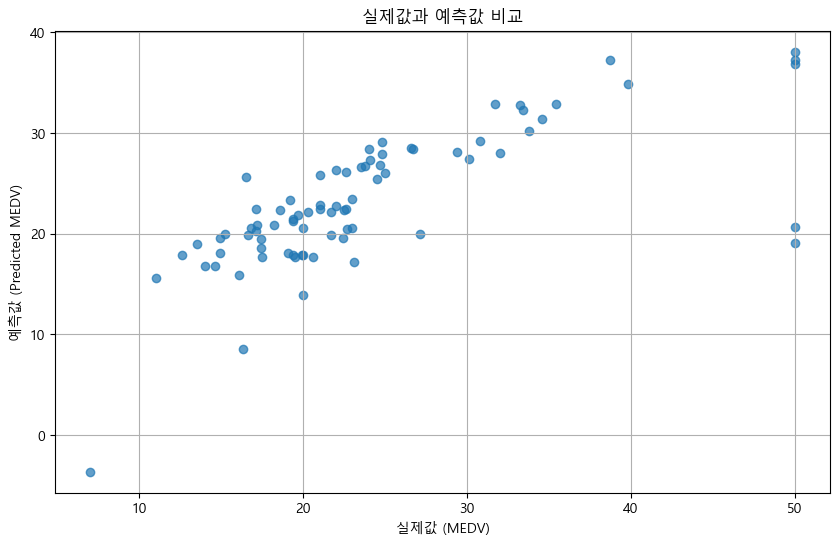

In [9]:
### 컬럼 설명 ###
# CRIM(타운별 1인당 범죄울), ZN(25,000평방피트 주택이 차지하는 비율), INDUS(비소매 상업지역 면적비율)
# CHAS(찰스강 인접 여부), NOX(일산화질소 농도), RM(주택 1가구당 평균 방 개수), AGE(1940년대 이전 주택 비율)
# DIS(보스턴 고용 센터까지의 가중거리), TAX(10,000달러당 재산세율), PTRATIO(타운별 학생교사 비율)
# B(타운별 흑인인구 비율 계산식), LSTAT(하위 계층의 비율), MEDV(주택의 중간 가격)

# 필요한 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 폰트지정
plt.rcParams['font.family'] = 'Malgun Gothic'

# 마이너스 부호 깨짐 지정
plt.rcParams['axes.unicode_minus'] = False

# 숫자가 지수표현식으로 나올 때 지정
pd.options.display.float_format = '{:.2f}'.format

# 데이터 로드
data = pd.read_csv('dataset/HousingData.csv')

# 데이터 확인
print(data.head())
print(data.info())

# 결측값 확인 및 처리
print(data.isnull().sum())

data = data.dropna()  # 결측값 제거

# 결측값 확인 및 처리
print(data.isnull().sum())

# 주요 변수 선택
X = data[['CRIM', 'RM', 'TAX', 'LSTAT']]
# 입력 변수: CRIM(범죄율), RM(방개수), TAX(세금), LSTAT(하위계층비율)
y = data['MEDV']  # 타겟 변수 (집값)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 생성 및 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 모델 평가
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2}')

# 회귀 계수 출력
print('회귀 계수:', model.coef_)
print('절편:', model.intercept_)

# 결과 시각화
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('실제값 (MEDV)')
plt.ylabel('예측값 (Predicted MEDV)')
plt.title('실제값과 예측값 비교')
plt.grid()
plt.show()

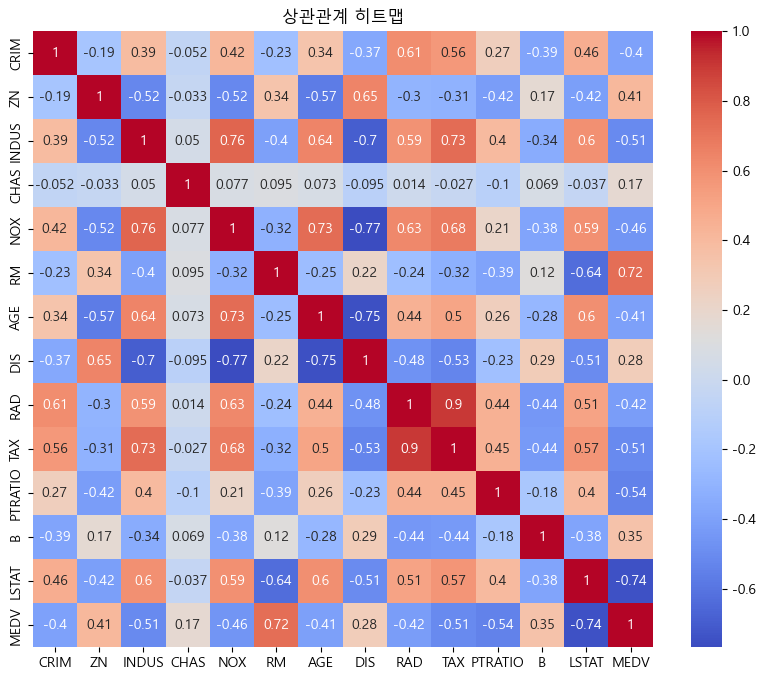

In [10]:
# 변수별 상관관계 히트맵
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('상관관계 히트맵')
plt.show()